<h1 align='center'>ADS ANALYSIS<h1>

# Project WorkFlow
1. importing libraries
2. importing a data set
3. data preprocessing and cleaning
4. EDA - exploratory data analysis
5. feature enfgineering
6. Feature scaling
7. train_test_split
8. choosing the model and building the model
9. predicting test data
10. evaluating our model - classification matrix

In [52]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [53]:
# importing the data set
df=pd.read_csv("/content/drive/MyDrive/Assignment/Social_Network_Ads (2).csv")

In [54]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,Male,19.0,19000.0,0.0
1,15810944.0,Male,35.0,20000.0,0.0
2,15668575.0,Female,26.0,43000.0,0.0
3,15603246.0,Female,27.0,57000.0,0.0
4,15804002.0,Male,19.0,76000.0,0.0


In [55]:
df.isnull().sum()   # checking null values

User ID            27
Gender             36
Age                30
EstimatedSalary    16
Purchased          11
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          373 non-null    float64
 1   Gender           364 non-null    object 
 2   Age              370 non-null    float64
 3   EstimatedSalary  384 non-null    float64
 4   Purchased        389 non-null    float64
dtypes: float64(4), object(1)
memory usage: 15.8+ KB


In [57]:
df.dropna(axis=0,how='all',inplace=True)   # dropping the row if all values are null in that row

In [58]:
df.isnull().sum()

User ID            16
Gender             25
Age                19
EstimatedSalary     5
Purchased           0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          373 non-null    float64
 1   Gender           364 non-null    object 
 2   Age              370 non-null    float64
 3   EstimatedSalary  384 non-null    float64
 4   Purchased        389 non-null    float64
dtypes: float64(4), object(1)
memory usage: 18.2+ KB


In [60]:
# User ID is not that much important for model building
df.drop(columns='User ID',axis=1,inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           364 non-null    object 
 1   Age              370 non-null    float64
 2   EstimatedSalary  384 non-null    float64
 3   Purchased        389 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.2+ KB


In [62]:
df.isnull().sum()

Gender             25
Age                19
EstimatedSalary     5
Purchased           0
dtype: int64

In [63]:
# filling with NaN  

df['EstimatedSalary']=df['EstimatedSalary'].fillna(0)
# age column
df['Age']=df['Age'].fillna(method='ffill')
# Gender
df['Gender']=df['Gender'].fillna(method='ffill')

In [64]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           389 non-null    object 
 1   Age              389 non-null    float64
 2   EstimatedSalary  389 non-null    float64
 3   Purchased        389 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.2+ KB


In [66]:
# Handling with categorical data we're using One Hot Encoder
from sklearn.preprocessing import OneHotEncoder


In [67]:
gender=pd.get_dummies(df.Gender,drop_first=True)

In [68]:
gender

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [69]:
df= pd.concat([gender,df],axis=1)

In [70]:
df.head()

,Male,Gender,Age,EstimatedSalary,Purchased
0,1,Male,19.0,19000.0,0.0
1,1,Male,35.0,20000.0,0.0
2,0,Female,26.0,43000.0,0.0
3,0,Female,27.0,57000.0,0.0
4,1,Male,19.0,76000.0,0.0


In [71]:
df.drop(columns='Gender', axis=1,inplace=True)

In [72]:
df.head()

,Male,Age,EstimatedSalary,Purchased
0,1,19.0,19000.0,0.0
1,1,35.0,20000.0,0.0
2,0,26.0,43000.0,0.0
3,0,27.0,57000.0,0.0
4,1,19.0,76000.0,0.0


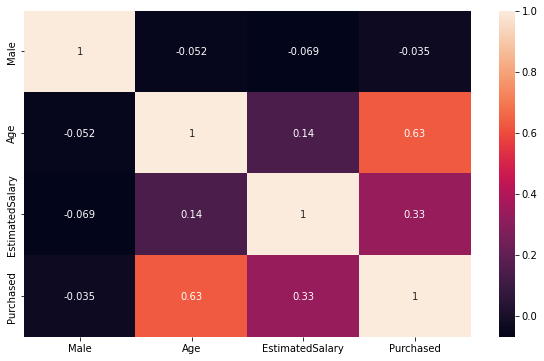

In [73]:
# correlation between variables
plt.figure(figsize=(10,6))
sb.heatmap(df.corr(),annot=True)

Age is good fetaure to be considered for this problem as it is having high correlation with our dependent column that is purchase.

In [74]:
df.head()

,Male,Age,EstimatedSalary,Purchased
0,1,19.0,19000.0,0.0
1,1,35.0,20000.0,0.0
2,0,26.0,43000.0,0.0
3,0,27.0,57000.0,0.0
4,1,19.0,76000.0,0.0


In [75]:
df.describe()

,Male,Age,EstimatedSalary,Purchased
count,389.000000,389.000000,389.000000,389.000000
mean,0.473008,37.866324,68269.922879,0.354756
std,0.499914,10.455730,34819.366652,0.479055
min,0.000000,18.000000,0.000000,0.000000
25%,0.000000,30.000000,42000.000000,0.000000
50%,0.000000,37.000000,68000.000000,0.000000
75%,1.000000,46.000000,87000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [76]:
# separeting dependent and independent features
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [77]:
x

,Male,Age,EstimatedSalary
0,1,19.0,19000.0
1,1,35.0,20000.0
2,0,26.0,43000.0
3,0,27.0,57000.0
4,1,19.0,76000.0
...,...,...,...
395,0,46.0,41000.0
396,1,51.0,23000.0
397,0,50.0,20000.0
398,1,36.0,33000.0


In [78]:
# Feture scaling
from sklearn.preprocessing import StandardScaler
standscale= StandardScaler()

In [79]:
x=standscale.fit_transform(x)

In [80]:
y.values

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 1.

In [81]:
# Train test split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=7)

In [86]:
# support vector classifier model
model= SVC(kernel='linear')

In [88]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [89]:
y_pred=model.predict(x_test)

In [90]:
y_pred

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0.])

In [91]:
y_test

257    0.0
222    1.0
395    1.0
106    0.0
14     0.0
      ... 
175    0.0
283    1.0
208    1.0
179    0.0
172    0.0
Name: Purchased, Length: 78, dtype: float64

In [93]:
# Evaluation matrics

from sklearn.metrics import confusion_matrix, accuracy_score

In [94]:
## Confusion metrix

cm=confusion_matrix(y_test,y_pred)
print(cm)

[[47  4]
 [ 9 18]]


In [97]:
 ## Accuracy_score
 accuracy_score(y_test,y_pred)

0.8333333333333334

In [98]:
## Calculating accuracy with code
c=(cm[0][0] + cm[1][1])/(cm[0][0]+cm[0][1]+ cm[1][0] +cm[1][1])
print(c)

0.8333333333333334


In [99]:
## Classification matrix

from sklearn.metrics import classification_report


In [101]:
cr=classification_report(y_test,y_pred)

In [102]:
print(cr)

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88        51
         1.0       0.82      0.67      0.73        27

    accuracy                           0.83        78
   macro avg       0.83      0.79      0.81        78
weighted avg       0.83      0.83      0.83        78



Not that much difference in f1- score so.. it is a balanced dat set. <br>Or else it is imbalanced data set